<a href="https://colab.research.google.com/github/RakeshBB08/Deep_learning/blob/master/ANN_on_ImageNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
# load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/255.0
print("x_train_Shape: ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train_Shape:  (60000, 28, 28)


In [18]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [6]:
from keras import activations
# Build the model
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = "softmax")]
)

In [7]:
model.compile(optimizer="adam",loss = 'sparse_categorical_crossentropy',
              metrics='accuracy')

In [8]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2905 - accuracy: 0.9161 - val_loss: 0.1371 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1401 - accuracy: 0.9584 - val_loss: 0.1030 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9685 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0876 - val_accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0752 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0638 - accuracy: 0.9794 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.0710 - val_accuracy:

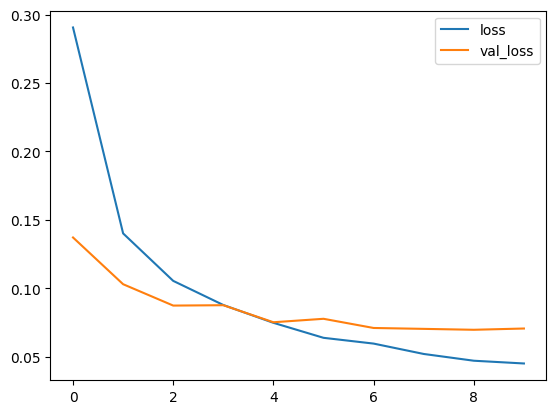

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label= 'val_loss')
plt.legend()

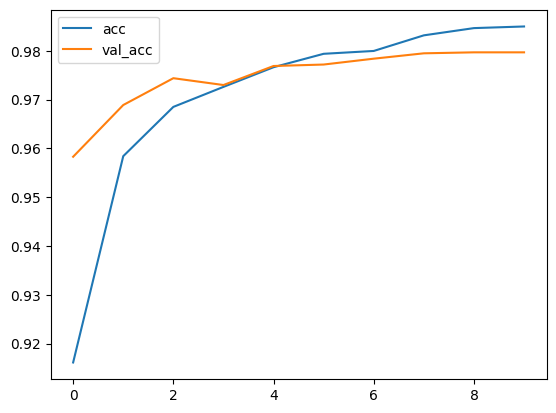

In [10]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label= 'val_acc')
plt.legend()

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9797


[0.0705958753824234, 0.9797000288963318]

313/313 [==============================] - 1s 4ms/step
Normalise confusion matrix
[[9.88775510e-01 0.00000000e+00 0.00000000e+00 2.04081633e-03
  0.00000000e+00 1.02040816e-03 5.10204082e-03 1.02040816e-03
  2.04081633e-03 0.00000000e+00]
 [0.00000000e+00 9.89427313e-01 2.64317181e-03 8.81057269e-04
  0.00000000e+00 0.00000000e+00 3.52422907e-03 0.00000000e+00
  3.52422907e-03 0.00000000e+00]
 [3.87596899e-03 9.68992248e-04 9.72868217e-01 1.93798450e-03
  9.68992248e-04 0.00000000e+00 1.93798450e-03 4.84496124e-03
  1.25968992e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.98019802e-03 9.81188119e-01
  0.00000000e+00 6.93069307e-03 9.90099010e-04 1.98019802e-03
  4.95049505e-03 1.98019802e-03]
 [0.00000000e+00 0.00000000e+00 1.01832994e-03 0.00000000e+00
  9.87780041e-01 0.00000000e+00 5.09164969e-03 2.03665988e-03
  0.00000000e+00 4.07331976e-03]
 [2.24215247e-03 0.00000000e+00 0.00000000e+00 3.36322870e-03
  1.12107623e-03 9.87668161e-01 4.48430493e-03 0.00000000e+00
  1.12107

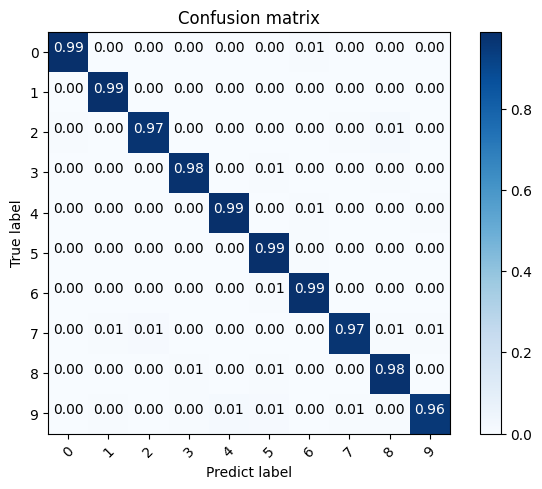

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize ='False',title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis =1)[:,np.newaxis]
    print('Normalise confusion matrix')
  else:
    print('Confusion matrix, without normalisation')
  print(cm)

  plt.imshow(cm,interpolation ='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),horizontalalignment = 'center',
            color = 'white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predict label')
  plt.show()

p_test= model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,p_test)

Text(0.5, 1.0, 'True label: 7, Predicted:1:')

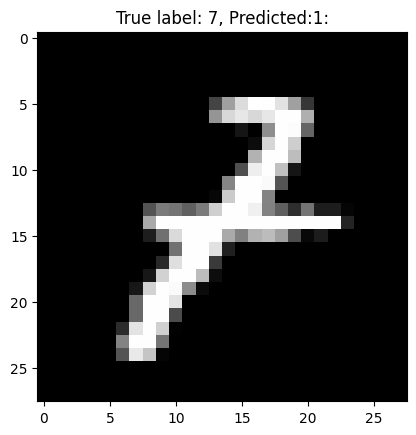

In [30]:
import numpy as np
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap = 'gray')
plt.title(f"True label: {y_test[i]}, Predicted:{p_test[i]}:")